# Part 1: London’s Underground Resilience

## I. Topological Network

### I.1. Centrality measures

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter

In [127]:
#the graphml file for London's underground
G = nx.read_graphml('london_tubenetwork.graphml')
type(G)

networkx.classes.graph.Graph

In [50]:
# list all operations of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])

76
__hash__
edge_subgraph
adjlist_outer_dict_factory
__getattribute__
__contains__
graph
__contains__
adjlist_outer_dict_factory
add_node
node_attr_dict_factory


In [63]:
print(G.number_of_nodes())
print(G.number_of_edges())

438
486


In [7]:
# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': '(534825.0140298002, 183290.813466997)'})

In [8]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])


In [9]:
# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997)})

In [10]:
# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1'})

In [11]:
# add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [12]:
# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1',
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

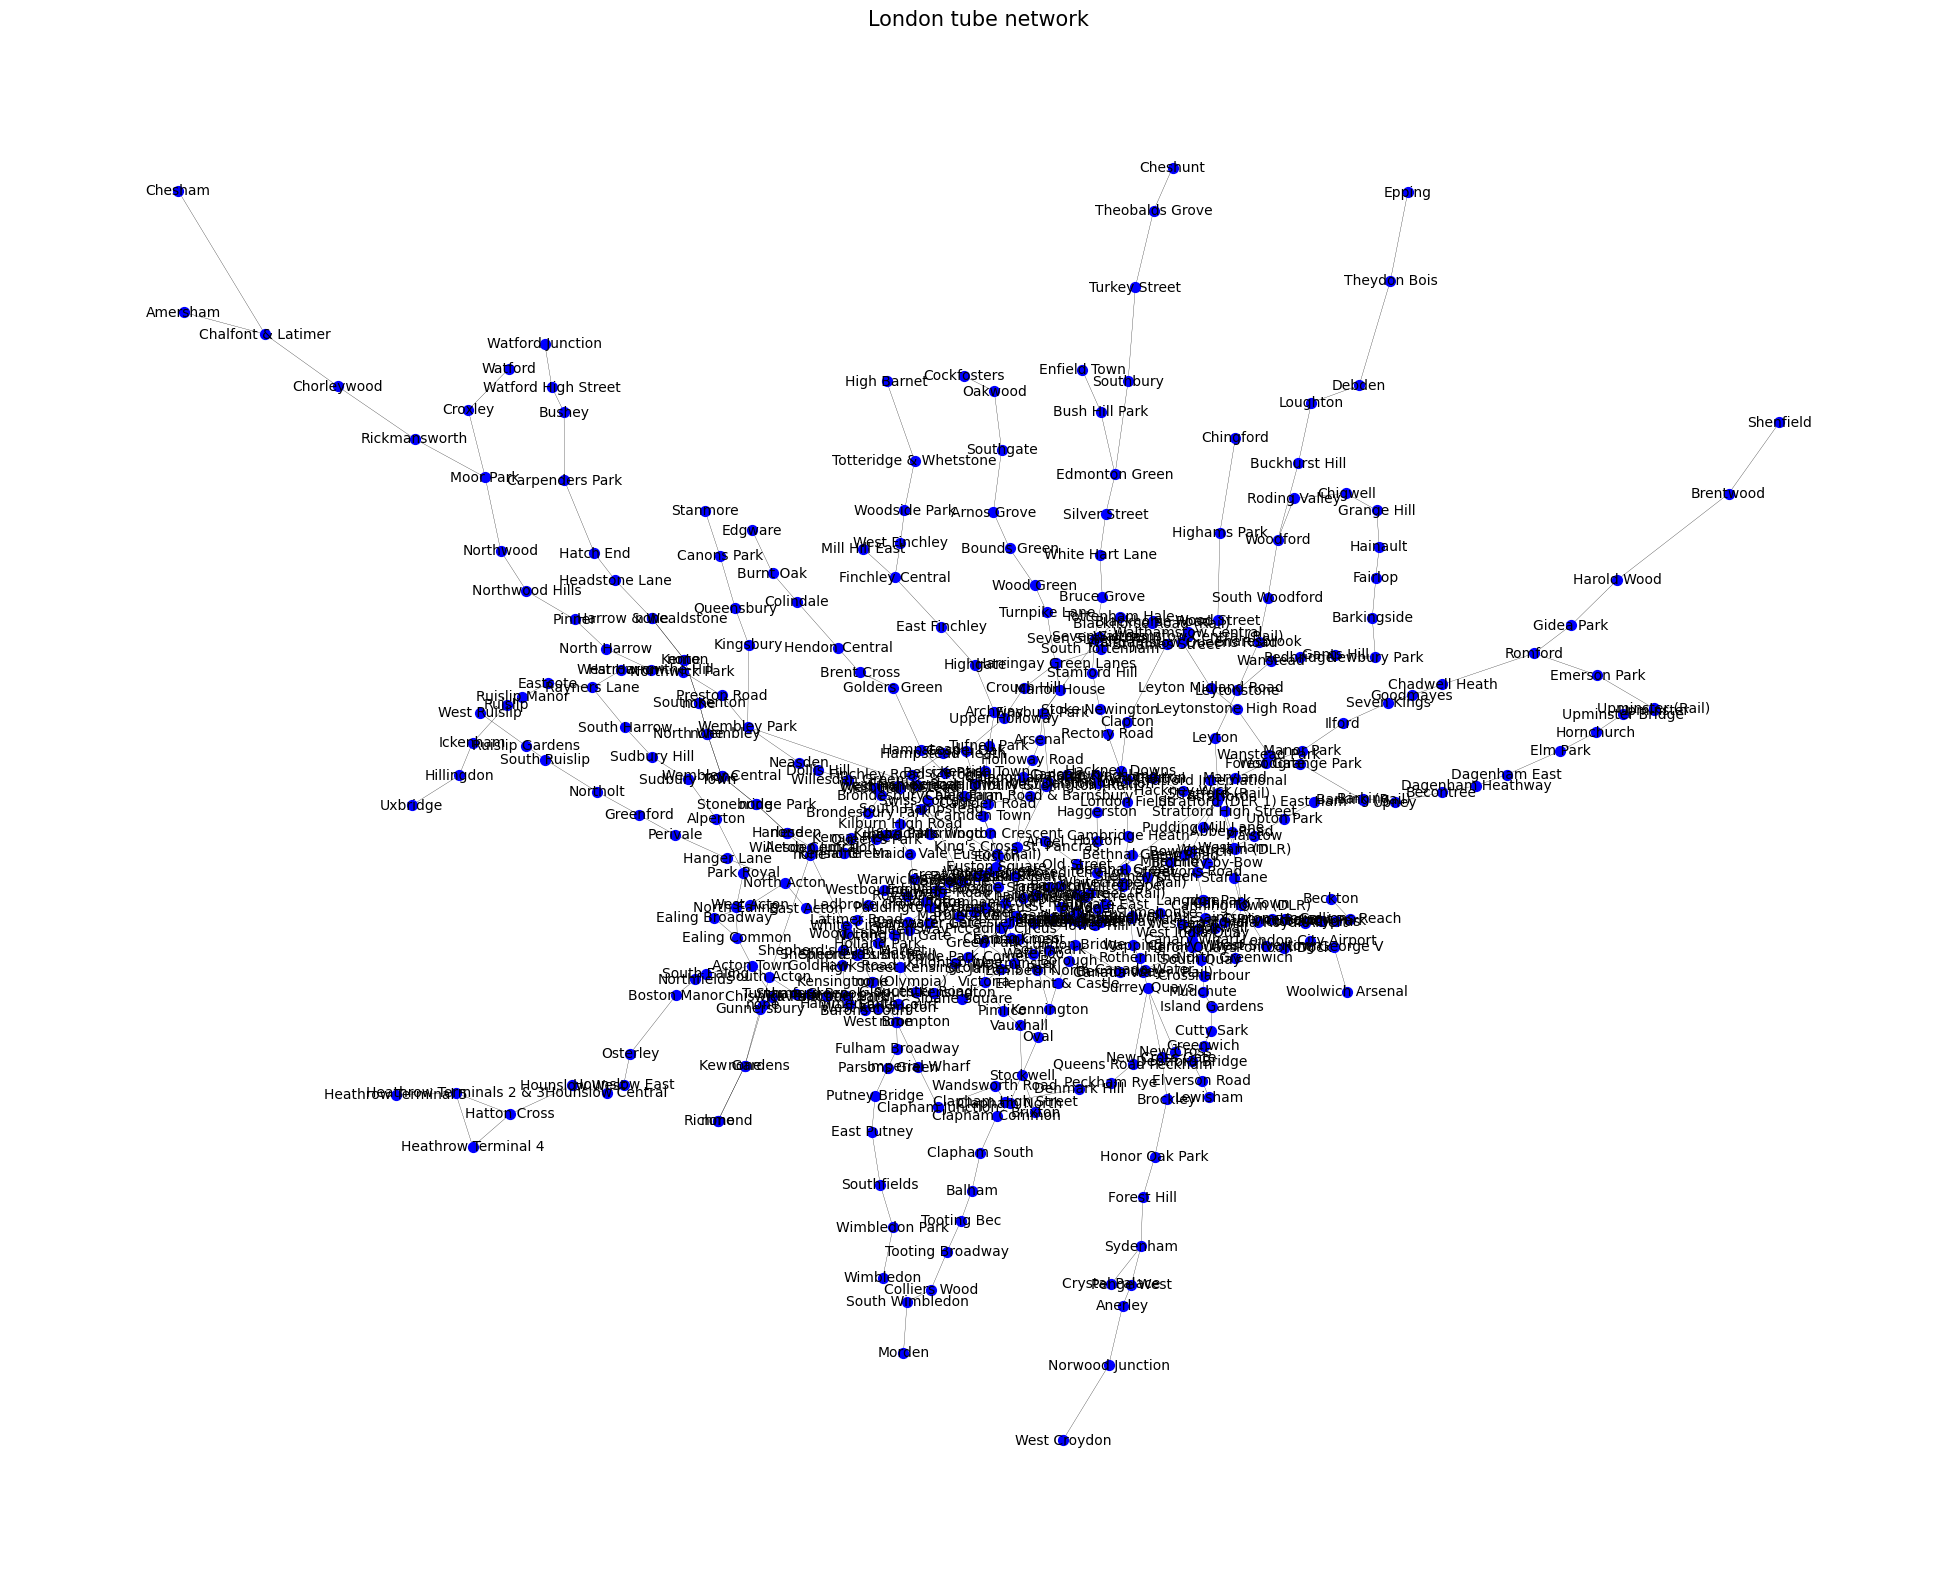

In [13]:
# plot the tube network

# plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [14]:
 #print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_id,name,station_2_,station_1_,length
0,910GCAMHTH,910GBTHNLGR,LeaValleyLine1,London Overground,Bethnal Green,Cambridge Heath,1076.082201
1,910GCAMHTH,910GLONFLDS,LeaValleyLine2,London Overground,London Fields,Cambridge Heath,970.949720
2,910GBTHNLGR,910GLIVST,LivStBeth,London Overground,Liverpool Street (Rail),Bethnal Green,1813.304143
3,910GBTHNLGR,940GZZLUBLG,NaN,NaN,Bethnal Green,Bethnal Green,481.514661
4,910GLONFLDS,910GHAKNYNM,LeaValleyLine3,London Overground,Hackney Downs,London Fields,917.502798
5,910GHAKNYNM,910GRCTRYRD,LeaValleyLine4,London Overground,Rectory Road,Hackney Downs,1178.231752
6,910GHAKNYNM,910GCLAPTON,ChingfordSpur1,London Overground,Clapton,Hackney Downs,1432.298268
7,910GRCTRYRD,910GSTKNWNG,LeaValleyLine5,London Overground,Stoke Newington,Rectory Road,775.442407
8,910GSTKNWNG,910GSTMFDHL,LeaValleyLine6,London Overground,Stamford Hill,Stoke Newington,1200.722885
9,910GSTMFDHL,910GSEVNSIS,LeaValleyLine7,London Overground,Seven Sisters (Rail),Stamford Hill,1001.203674


#### Degree Centrality 

In [15]:
# calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [16]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


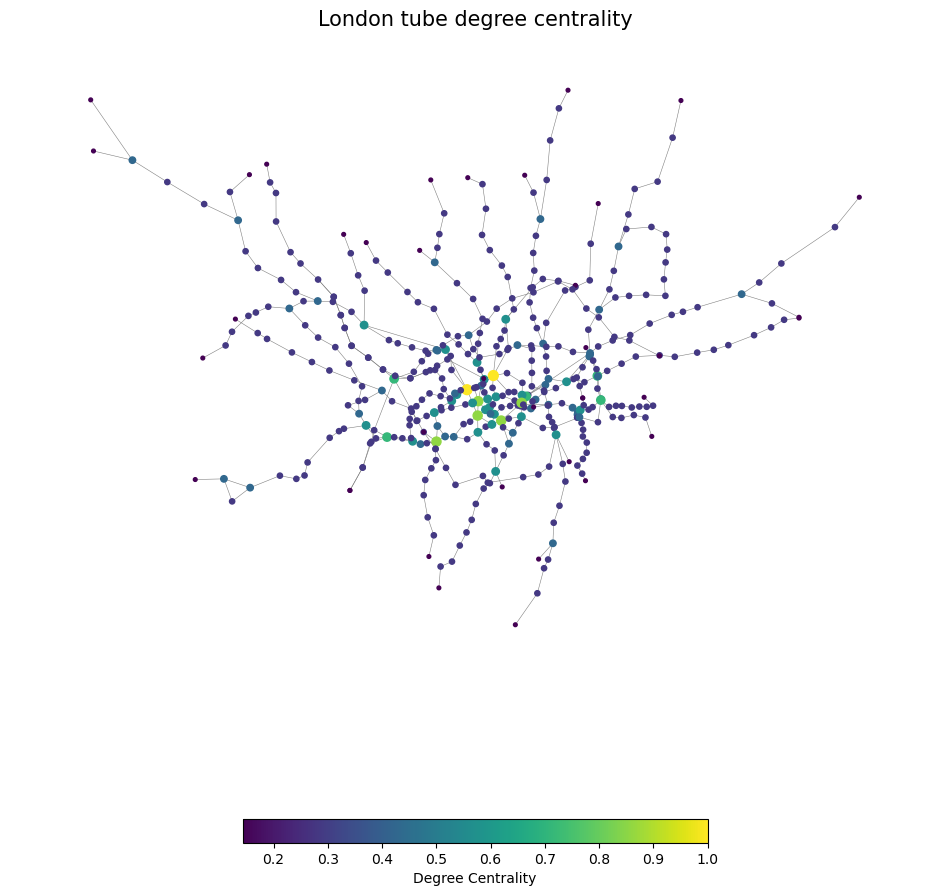

In [17]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]
deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph
pos=pos

fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### Closeness Centrality 

In [18]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,station_name,closeness_w
940GZZLUOXC,Oxford Circus,0.000073
940GZZLUTCR,Tottenham Court Road,0.000073
940GZZLUBST,Baker Street,0.000072
940GZZLUHBN,Holborn,0.000072
940GZZLUBND,Bond Street,0.000072
940GZZLURGP,Regent's Park,0.000072
940GZZLUPCC,Piccadilly Circus,0.000072
940GZZLUKSX,King's Cross St. Pancras,0.000072
940GZZLULSQ,Leicester Square,0.000071
940GZZLUGPS,Great Portland Street,0.000071


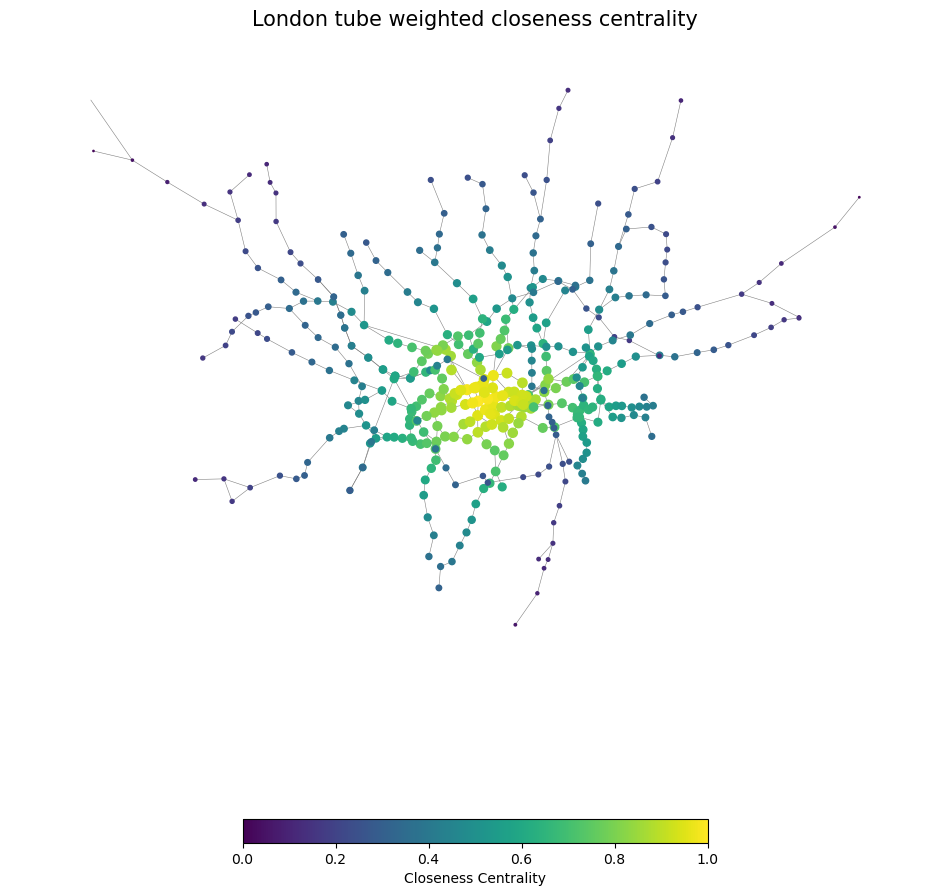

In [19]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

#### Betweeness Centrality 

In [20]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [21]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
940GZZLUBST,Baker Street,36734.0
940GZZLUFYR,Finchley Road,29786.0
940GZZLULVT,Liverpool Street,25752.0
910GWHMDSTD,West Hampstead,25747.0
940GZZLUWHP,West Hampstead,25686.0
940GZZLUKSX,King's Cross St. Pancras,24628.0
940GZZLUBNK,Bank,21087.0
940GZZLUMED,Mile End,17759.0
940GZZLUOXC,Oxford Circus,17317.0
910GBTHNLGR,Bethnal Green,17211.0


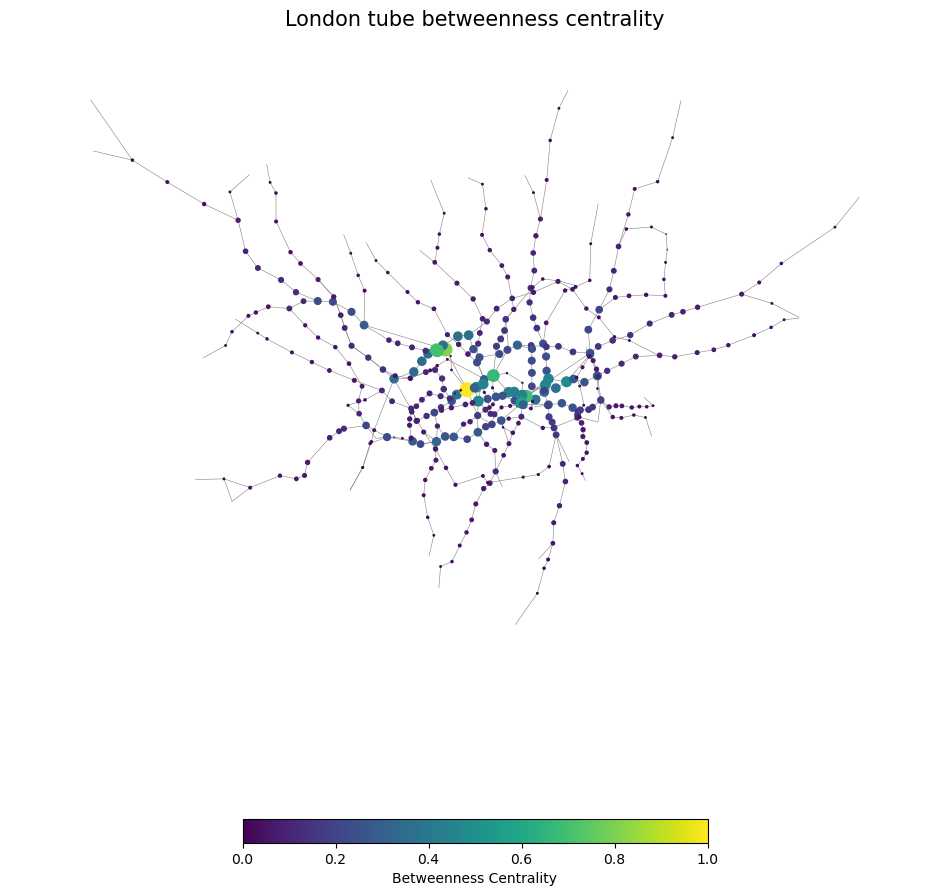

In [22]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

### I.2. Impact Measures

### I.3. Node Removal

#### Non-sequential remova

degree centrality

In [131]:
#the graphml file for London's underground
G = nx.read_graphml('london_tubenetwork.graphml')
type(G)

networkx.classes.graph.Graph

In [132]:
G2=G

In [133]:
# Initialize variables
num_nodes_to_remove = 10
removed_nodes = []

# Loop until the desired number of nodes is removed
for i in range(1, num_nodes_to_remove + 1):
    # List of nodes sorted by degree centrality
    values_sorted = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
    
    # Nodes to remove
    nodes_to_remove = [e for e, v in values_sorted[:i]]  # Change the slice to remove more nodes
    
    # Remove nodes from the graph
    G2.remove_nodes_from(nodes_to_remove)
    
    # Add removed nodes to the list
    removed_nodes.extend(nodes_to_remove)

    # Number of connected components
    num_components = nx.number_connected_components(G2)

    # Size of each component
    component_sizes = [len(component) for component in nx.connected_components(G2)]

    # Largest component
    largest_component = max(nx.connected_components(G2), key=len)

    # Size of the largest component
    largest_component_size = len(largest_component)

    # Diameter of the largest component
    diameter = nx.diameter(G2.subgraph(largest_component))

    # Output results for this iteration
    print("Iteration:", i)
    print("Number of connected components:", num_components)
    print("Sizes of connected components:", component_sizes)
    print("Size of the largest component:", largest_component_size)
    print("Diameter of the largest component:", diameter)
    print("Nodes removed:", removed_nodes)
    print("\n")


Iteration: 1
Number of connected components: 2
Sizes of connected components: [420, 17]
Size of the largest component: 420
Diameter of the largest component: 47
Nodes removed: ['940GZZLUKSX']


Iteration: 2
Number of connected components: 3
Sizes of connected components: [417, 17, 2]
Size of the largest component: 417
Diameter of the largest component: 54
Nodes removed: ['940GZZLUKSX', '940GZZLUKSX', '940GZZLUBST']


Iteration: 3
Number of connected components: 3
Sizes of connected components: [416, 17, 2]
Size of the largest component: 416
Diameter of the largest component: 54
Nodes removed: ['940GZZLUKSX', '940GZZLUKSX', '940GZZLUBST', '940GZZLUKSX', '940GZZLUBST', '940GZZLUGPK']


Iteration: 4
Number of connected components: 4
Sizes of connected components: [414, 17, 2, 1]
Size of the largest component: 414
Diameter of the largest component: 54
Nodes removed: ['940GZZLUKSX', '940GZZLUKSX', '940GZZLUBST', '940GZZLUKSX', '940GZZLUBST', '940GZZLUGPK', '940GZZLUKSX', '940GZZLUBST', '940

closeness centrality

In [134]:
#the graphml file for London's underground
G = nx.read_graphml('london_tubenetwork.graphml')
type(G)

networkx.classes.graph.Graph

In [135]:
G2=G

In [136]:
# Initialize variables
num_nodes_to_remove = 10
removed_nodes = []

# Loop until the desired number of nodes is removed
for i in range(1, num_nodes_to_remove + 1):
    # List of nodes sorted by closeness centrality
    values_sorted = sorted(clos_w.items(), key=itemgetter(1), reverse=True)
    
    # Nodes to remove
    nodes_to_remove = [e for e, v in values_sorted[:i]]  # Change the slice to remove more nodes
    
    # Remove nodes from the graph
    G2.remove_nodes_from(nodes_to_remove)
    
    # Add removed nodes to the list
    removed_nodes.extend(nodes_to_remove)

    # Number of connected components
    num_components = nx.number_connected_components(G2)

    # Size of each component
    component_sizes = [len(component) for component in nx.connected_components(G2)]

    # Largest component
    largest_component = max(nx.connected_components(G2), key=len)

    # Size of the largest component
    largest_component_size = len(largest_component)

    # Diameter of the largest component
    diameter = nx.diameter(G2.subgraph(largest_component))

    # Output results for this iteration
    print("Iteration:", i)
    print("Number of connected components:", num_components)
    print("Sizes of connected components:", component_sizes)
    print("Size of the largest component:", largest_component_size)
    print("Diameter of the largest component:", diameter)
    print("Nodes removed:", removed_nodes)
    print("\n")


Iteration: 1
Number of connected components: 1
Sizes of connected components: [437]
Size of the largest component: 437
Diameter of the largest component: 47
Nodes removed: ['940GZZLUOXC']


Iteration: 2
Number of connected components: 1
Sizes of connected components: [436]
Size of the largest component: 436
Diameter of the largest component: 47
Nodes removed: ['940GZZLUOXC', '940GZZLUOXC', '940GZZLUTCR']


Iteration: 3
Number of connected components: 2
Sizes of connected components: [434, 1]
Size of the largest component: 434
Diameter of the largest component: 54
Nodes removed: ['940GZZLUOXC', '940GZZLUOXC', '940GZZLUTCR', '940GZZLUOXC', '940GZZLUTCR', '940GZZLUBST']


Iteration: 4
Number of connected components: 2
Sizes of connected components: [433, 1]
Size of the largest component: 433
Diameter of the largest component: 54
Nodes removed: ['940GZZLUOXC', '940GZZLUOXC', '940GZZLUTCR', '940GZZLUOXC', '940GZZLUTCR', '940GZZLUBST', '940GZZLUOXC', '940GZZLUTCR', '940GZZLUBST', '940GZZLUHB

betweenness centrality

In [127]:
#the graphml file for London's underground
G = nx.read_graphml('london_tubenetwork.graphml')
type(G)

networkx.classes.graph.Graph

In [128]:
G2=G

In [130]:
# Initialize variables
num_nodes_to_remove = 10
removed_nodes = []

# Loop until the desired number of nodes is removed
for i in range(1, num_nodes_to_remove + 1):
    # List of nodes sorted by betweenness centrality
    values_sorted = sorted(bet_london_w.items(), key=itemgetter(1), reverse=True)
    
    # Nodes to remove
    nodes_to_remove = [e for e, v in values_sorted[:i]]  # Change the slice to remove more nodes
    
    # Remove nodes from the graph
    G2.remove_nodes_from(nodes_to_remove)
    
    # Add removed nodes to the list
    removed_nodes.extend(nodes_to_remove)

    # Number of connected components
    num_components = nx.number_connected_components(G2)

    # Size of each component
    component_sizes = [len(component) for component in nx.connected_components(G2)]

    # Largest component
    largest_component = max(nx.connected_components(G2), key=len)

    # Size of the largest component
    largest_component_size = len(largest_component)

    # Diameter of the largest component
    diameter = nx.diameter(G2.subgraph(largest_component))

    # Output results for this iteration
    print("Iteration:", i)
    print("Number of connected components:", num_components)
    print("Sizes of connected components:", component_sizes)
    print("Size of the largest component:", largest_component_size)
    print("Diameter of the largest component:", diameter)
    print("Nodes removed:", removed_nodes)
    print("\n")


Iteration: 1
Number of connected components: 1
Sizes of connected components: [437]
Size of the largest component: 437
Diameter of the largest component: 54
Nodes removed: ['940GZZLUBST']


Iteration: 2
Number of connected components: 2
Sizes of connected components: [434, 2]
Size of the largest component: 434
Diameter of the largest component: 57
Nodes removed: ['940GZZLUBST', '940GZZLUBST', '940GZZLUFYR']


Iteration: 3
Number of connected components: 2
Sizes of connected components: [433, 2]
Size of the largest component: 433
Diameter of the largest component: 60
Nodes removed: ['940GZZLUBST', '940GZZLUBST', '940GZZLUFYR', '940GZZLUBST', '940GZZLUFYR', '940GZZLULVT']


Iteration: 4
Number of connected components: 2
Sizes of connected components: [432, 2]
Size of the largest component: 432
Diameter of the largest component: 83
Nodes removed: ['940GZZLUBST', '940GZZLUBST', '940GZZLUFYR', '940GZZLUBST', '940GZZLUFYR', '940GZZLULVT', '940GZZLUBST', '940GZZLUFYR', '940GZZLULVT', '910GWHM

#### Sequential

degree centrality

In [141]:
#the graphml file for London's underground
G = nx.read_graphml('london_tubenetwork.graphml')
type(G)

networkx.classes.graph.Graph

In [142]:
G2=G

In [144]:
# Initialize variables
num_nodes_to_remove = 10
removed_nodes = []

# Loop until the desired number of nodes is removed
for _ in range(num_nodes_to_remove):
    # Calculate degree centrality
    deg_london = nx.degree_centrality(G2)

    # Get the node with maximum degree centrality
    max_node = max(deg_london, key=deg_london.get)
    
    # Remove the node from the graph
    G2.remove_node(max_node)
    
    # Add removed node to the list
    removed_nodes.append(max_node)

    # Recalculate degree centrality
    deg_london = nx.degree_centrality(G2)

    # Recalculate largest connected component
    largest_component = max(nx.connected_components(G2), key=len)

    # Calculate diameter of the largest connected component
    diameter = nx.diameter(G2.subgraph(largest_component))

    # Output results for this iteration
    print("Iteration:", len(removed_nodes))
    print("Number of connected components:", nx.number_connected_components(G2))
    print("Size of the largest component:", len(largest_component))
    print("Diameter of the largest component:", diameter)
    print("Nodes removed:", removed_nodes)
    print("\n")


Iteration: 1
Number of connected components: 2
Size of the largest component: 420
Diameter of the largest component: 47
Nodes removed: ['940GZZLUKSX']


Iteration: 2
Number of connected components: 3
Size of the largest component: 417
Diameter of the largest component: 54
Nodes removed: ['940GZZLUKSX', '940GZZLUBST']


Iteration: 3
Number of connected components: 3
Size of the largest component: 416
Diameter of the largest component: 54
Nodes removed: ['940GZZLUKSX', '940GZZLUBST', '940GZZLUGPK']


Iteration: 4
Number of connected components: 5
Size of the largest component: 406
Diameter of the largest component: 55
Nodes removed: ['940GZZLUKSX', '940GZZLUBST', '940GZZLUGPK', '940GZZLUECT']


Iteration: 5
Number of connected components: 5
Size of the largest component: 405
Diameter of the largest component: 59
Nodes removed: ['940GZZLUKSX', '940GZZLUBST', '940GZZLUGPK', '940GZZLUECT', '940GZZLUBNK']


Iteration: 6
Number of connected components: 6
Size of the largest component: 403
Dia

closeness centrality

In [148]:
#the graphml file for London's underground
G = nx.read_graphml('london_tubenetwork.graphml')
type(G)

networkx.classes.graph.Graph

In [149]:
G2=G

In [150]:
# Initialize variables
num_nodes_to_remove = 10
removed_nodes = []

# Loop until the desired number of nodes is removed
for _ in range(num_nodes_to_remove):
    # Calculate closeness centrality
    clos_w = nx.closeness_centrality(G2, distance='length')

    # Get the node with maximum closeness centrality
    max_node = max(clos_w, key=clos_w.get)
    
    # Remove the node from the graph
    G2.remove_node(max_node)
    
    # Add removed node to the list
    removed_nodes.append(max_node)

    # Recalculate closeness centrality
    clos_w = nx.closeness_centrality(G2, distance='length')

    # Recalculate largest connected component
    largest_component = max(nx.connected_components(G2), key=len)

    # Calculate diameter of the largest connected component
    diameter = nx.diameter(G2.subgraph(largest_component))

    # Output results for this iteration
    print("Iteration:", len(removed_nodes))
    print("Number of connected components:", nx.number_connected_components(G2))
    print("Size of the largest component:", len(largest_component))
    print("Diameter of the largest component:", diameter)
    print("Nodes removed:", removed_nodes)
    print("\n")


Iteration: 1
Number of connected components: 1
Size of the largest component: 437
Diameter of the largest component: 47
Nodes removed: ['940GZZLUOXC']


Iteration: 2
Number of connected components: 2
Size of the largest component: 435
Diameter of the largest component: 54
Nodes removed: ['940GZZLUOXC', '940GZZLUBST']


Iteration: 3
Number of connected components: 2
Size of the largest component: 434
Diameter of the largest component: 60
Nodes removed: ['940GZZLUOXC', '940GZZLUBST', '940GZZLULVT']


Iteration: 4
Number of connected components: 2
Size of the largest component: 433
Diameter of the largest component: 60
Nodes removed: ['940GZZLUOXC', '940GZZLUBST', '940GZZLULVT', '940GZZLUEMB']


Iteration: 5
Number of connected components: 3
Size of the largest component: 430
Diameter of the largest component: 60
Nodes removed: ['940GZZLUOXC', '940GZZLUBST', '940GZZLULVT', '940GZZLUEMB', '940GZZDLPOP']


Iteration: 6
Number of connected components: 3
Size of the largest component: 429
Dia

betweenness centrality

In [145]:
#the graphml file for London's underground
G = nx.read_graphml('london_tubenetwork.graphml')
type(G)

networkx.classes.graph.Graph

In [146]:
G2=G

In [147]:
# Initialize variables
num_nodes_to_remove = 10
removed_nodes = []

# Loop until the desired number of nodes is removed
for _ in range(num_nodes_to_remove):
    # Calculate betweenness centrality
    bet_london_w = nx.betweenness_centrality(G2, weight='length',normalized=False)

    # Get the node with maximum betweenness centrality
    max_node = max(bet_london_w, key=bet_london_w.get)
    
    # Remove the node from the graph
    G2.remove_node(max_node)
    
    # Add removed node to the list
    removed_nodes.append(max_node)

    # Recalculate betweenness centrality
    bet_london_w = nx.betweenness_centrality(G2,weight='length',normalized=False)

    # Recalculate largest connected component
    largest_component = max(nx.connected_components(G2), key=len)

    # Calculate diameter of the largest connected component
    diameter = nx.diameter(G2.subgraph(largest_component))

    # Output results for this iteration
    print("Iteration:", len(removed_nodes))
    print("Number of connected components:", nx.number_connected_components(G2))
    print("Size of the largest component:", len(largest_component))
    print("Diameter of the largest component:", diameter)
    print("Nodes removed:", removed_nodes)
    print("\n")


Iteration: 1
Number of connected components: 1
Size of the largest component: 437
Diameter of the largest component: 54
Nodes removed: ['940GZZLUBST']


Iteration: 2
Number of connected components: 2
Size of the largest component: 413
Diameter of the largest component: 70
Nodes removed: ['940GZZLUBST', '910GBTHNLGR']


Iteration: 3
Number of connected components: 4
Size of the largest component: 403
Diameter of the largest component: 73
Nodes removed: ['940GZZLUBST', '910GBTHNLGR', '940GZZLUECT']


Iteration: 4
Number of connected components: 5
Size of the largest component: 204
Diameter of the largest component: 67
Nodes removed: ['940GZZLUBST', '910GBTHNLGR', '940GZZLUECT', '940GZZLUNHG']


Iteration: 5
Number of connected components: 6
Size of the largest component: 198
Diameter of the largest component: 32
Nodes removed: ['940GZZLUBST', '910GBTHNLGR', '940GZZLUECT', '940GZZLUNHG', '910GWHMDSTD']


Iteration: 6
Number of connected components: 6
Size of the largest component: 197
Dia

## II. Flows: Weighted Network

In [158]:
for index, row in data.iterrows():
    origin = row['station_origin']
    destination = row['station_destination']
    distance = row['distance']
    flow = row['flows']
    
   
    G.add_node(origin)
    G.add_node(destination)
    
    # weight_new
    if flow == 0:
        weight_new = distance * 10000
    else:
        weight_new = distance / flow
    
    G.add_edge(origin, destination, weight=flow, distance=distance, weight_new=weight_new)



In [159]:
 #print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,weight_new,distance,weight
0,Abbey Road,Bank and Monument,8.131525e+07,8131.525097,0
1,Abbey Road,Beckton,8.510122e+03,8510.121774,1
2,Abbey Road,Blackwall,1.258483e+03,3775.448872,3
3,Abbey Road,Canary Wharf,5.086514e+03,5086.514220,1
4,Abbey Road,Canning Town,6.024117e+01,2228.923167,37
5,Abbey Road,Crossharbour,6.686476e+03,6686.475560,1
6,Abbey Road,Custom House,3.824856e+07,3824.855630,0
7,Abbey Road,Cutty Sark,4.251949e+03,8503.898909,2
8,Abbey Road,Cyprus,9.331571e+02,6532.099618,7
9,Abbey Road,Devons Road,3.958324e+03,3958.324171,1


### II.1.

degree centrality

In [179]:
def weighted_degree_centrality(G):
    centrality = {}
    for node in G.nodes():
        total_weight = sum(G[node][neighbor]['weight'] for neighbor in G.neighbors(node))
        centrality[node] = total_weight
    return centrality


deg_london = weighted_degree_centrality(G)


top_10_centrality = sorted(deg_london.items(), key=lambda x: x[1], reverse=True)[:10]


for node, deg_london_value in top_10_centrality:
    print(f"Node: {node}, Weighted Degree Centrality: {deg_london_value}")



Node: Waterloo, Weighted Degree Centrality: 67372
Node: Stratford, Weighted Degree Centrality: 59311
Node: Victoria, Weighted Degree Centrality: 37517
Node: London Bridge, Weighted Degree Centrality: 32597
Node: Liverpool Street, Weighted Degree Centrality: 31473
Node: Bank and Monument, Weighted Degree Centrality: 29494
Node: King's Cross St. Pancras, Weighted Degree Centrality: 28307
Node: Canada Water, Weighted Degree Centrality: 27026
Node: Finsbury Park, Weighted Degree Centrality: 24735
Node: Highbury & Islington, Weighted Degree Centrality: 23714


In [180]:
# DataFrame
df_centrality = pd.DataFrame(top_10_centrality, columns=['station_name', 'degree'])

df_centrality


,station_name,degree
0,Waterloo,67372
1,Stratford,59311
2,Victoria,37517
3,London Bridge,32597
4,Liverpool Street,31473
5,Bank and Monument,29494
6,King's Cross St. Pancras,28307
7,Canada Water,27026
8,Finsbury Park,24735
9,Highbury & Islington,23714


In [161]:
 #Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='weight_new')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,station_name,closeness_w
Farringdon,NaN,0.000034
Liverpool Street,NaN,0.000034
Bank and Monument,NaN,0.000034
Oxford Circus,NaN,0.000034
Moorgate,NaN,0.000034
King's Cross St. Pancras,NaN,0.000034
Barbican,NaN,0.000034
Holborn,NaN,0.000034
Canary Wharf,NaN,0.000034
Bond Street,NaN,0.000034


In [162]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='weight_new',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [163]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
Liverpool Street,NaN,74137.000
Paddington,NaN,50820.500
Waterloo,NaN,42551.000
King's Cross St. Pancras,NaN,37024.750
Stratford,NaN,36922.125
Highbury & Islington,NaN,32573.750
Hammersmith,NaN,28904.250
Bank and Monument,NaN,28096.000
Finsbury Park,NaN,28025.500
London Bridge,NaN,25626.000


### II.2.

### II.3.

#### degree

In [201]:

for index, row in data.iterrows():
    origin = row['station_origin']
    destination = row['station_destination']
    distance = row['distance']
    flow = row['flows']
    
   
    G.add_node(origin)
    G.add_node(destination)
    
    # weight_new
    if flow == 0:
        weight_new = distance * 10000
    else:
        weight_new = distance / flow
    
   
    G.add_edge(origin, destination, weight=flow, distance=distance, weight_new=weight_new)



In [202]:
G2=G
 #print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G2)
df[0:10]

,source,target,weight_new,distance,weight
0,Abbey Road,Bank and Monument,8.131525e+07,8131.525097,0
1,Abbey Road,Beckton,8.510122e+03,8510.121774,1
2,Abbey Road,Blackwall,1.258483e+03,3775.448872,3
3,Abbey Road,Canary Wharf,5.086514e+03,5086.514220,1
4,Abbey Road,Canning Town,6.024117e+01,2228.923167,37
5,Abbey Road,Crossharbour,6.686476e+03,6686.475560,1
6,Abbey Road,Custom House,3.824856e+07,3824.855630,0
7,Abbey Road,Cutty Sark,4.251949e+03,8503.898909,2
8,Abbey Road,Cyprus,9.331571e+02,6532.099618,7
9,Abbey Road,Devons Road,3.958324e+03,3958.324171,1


In [203]:
import copy

    
# Initialize variables
num_nodes_to_remove = 3
removed_nodes = []

G_undirected = G2.to_undirected()

# Loop until the desired number of nodes is removed
for i in range(1, num_nodes_to_remove + 1):
    
    G_undirected_copy = copy.deepcopy(G_undirected)

    # List of nodes sorted by degree centrality
    values_sorted = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
    
    # Nodes to remove
    nodes_to_remove = [e for e, v in values_sorted[:i]]  # Change the slice to remove more nodes
    
    # Remove nodes from the graph
    G_undirected_copy.remove_nodes_from(nodes_to_remove)
    
    # Add removed nodes to the list
    removed_nodes.extend(nodes_to_remove)

    # Number of connected components
    num_components = nx.number_connected_components(G_undirected_copy)

    # Size of each component
    component_sizes = [len(component) for component in nx.connected_components(G_undirected_copy)]

    # Largest component
    largest_component = max(nx.connected_components(G_undirected_copy), key=len)

    # Size of the largest component
    largest_component_size = len(largest_component)

    # Diameter of the largest component
    diameter = nx.diameter(G_undirected_copy.subgraph(largest_component))

    # Calculate largest_component_flows
    largest_component_flows = sum(G_undirected.edges[origin, destination]['weight'] for origin, destination in G_undirected.edges(largest_component))
    
    # Calculate weighted_largest_component_size
    weighted_largest_component_size = largest_component_size * largest_component_flows

    # Calculate weighted_diameter
    weighted_diameter = diameter * largest_component_flows

    # Output results for this iteration
    print("Iteration:", i)
    print("Number of connected components:", num_components)
    print("Sizes of connected components:", component_sizes)
    print("Size of the largest component:", largest_component_size)
    print("Diameter of the largest component:", diameter)
    print("Largest component flows:", largest_component_flows)
    print("Weighted largest component size:", weighted_largest_component_size)
    print("Weighted diameter:", weighted_diameter)
    print("Nodes removed:", removed_nodes)
    print("\n")


Iteration: 1
Number of connected components: 1
Sizes of connected components: [398]
Size of the largest component: 398
Diameter of the largest component: 3
Largest component flows: 842587
Weighted largest component size: 335349626
Weighted diameter: 2527761
Nodes removed: ['Waterloo']


Iteration: 2
Number of connected components: 1
Sizes of connected components: [397]
Size of the largest component: 397
Diameter of the largest component: 3
Largest component flows: 841319
Weighted largest component size: 334003643
Weighted diameter: 2523957
Nodes removed: ['Waterloo', 'Waterloo', 'Stratford']


Iteration: 3
Number of connected components: 1
Sizes of connected components: [396]
Size of the largest component: 396
Diameter of the largest component: 3
Largest component flows: 840812
Weighted largest component size: 332961552
Weighted diameter: 2522436
Nodes removed: ['Waterloo', 'Waterloo', 'Stratford', 'Waterloo', 'Stratford', 'Victoria']




#### closeness centrality

In [182]:

for index, row in data.iterrows():
    origin = row['station_origin']
    destination = row['station_destination']
    distance = row['distance']
    flow = row['flows']
    
   
    G.add_node(origin)
    G.add_node(destination)
    
    
    if flow == 0:
        weight_new = distance * 10000
    else:
        weight_new = distance / flow
    
  
    G.add_edge(origin, destination, weight=flow, distance=distance, weight_new=weight_new)



In [183]:
G2=G
 #print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G2)
df[0:10]

,source,target,weight_new,distance,weight
0,Abbey Road,Bank and Monument,8.131525e+07,8131.525097,0
1,Abbey Road,Beckton,8.510122e+03,8510.121774,1
2,Abbey Road,Blackwall,1.258483e+03,3775.448872,3
3,Abbey Road,Canary Wharf,5.086514e+03,5086.514220,1
4,Abbey Road,Canning Town,6.024117e+01,2228.923167,37
5,Abbey Road,Crossharbour,6.686476e+03,6686.475560,1
6,Abbey Road,Custom House,3.824856e+07,3824.855630,0
7,Abbey Road,Cutty Sark,4.251949e+03,8503.898909,2
8,Abbey Road,Cyprus,9.331571e+02,6532.099618,7
9,Abbey Road,Devons Road,3.958324e+03,3958.324171,1


In [184]:
# Initialize variables
num_nodes_to_remove = 3
removed_nodes = []


G_undirected = G2.to_undirected()

# Loop until the desired number of nodes is removed
for i in range(1, num_nodes_to_remove + 1):
    
    G_undirected_copy = copy.deepcopy(G_undirected)

    # List of nodes sorted by closeness centrality
    values_sorted = sorted(clos_w.items(), key=itemgetter(1), reverse=True)
    
    # Nodes to remove
    nodes_to_remove = [e for e, v in values_sorted[:i]]  # Change the slice to remove more nodes
    
    # Remove nodes from the graph
    G_undirected_copy.remove_nodes_from(nodes_to_remove)
    
    # Add removed nodes to the list
    removed_nodes.extend(nodes_to_remove)

    # Number of connected components
    num_components = nx.number_connected_components(G_undirected_copy)

    # Size of each component
    component_sizes = [len(component) for component in nx.connected_components(G_undirected_copy)]

    # Largest component
    largest_component = max(nx.connected_components(G_undirected_copy), key=len)

    # Size of the largest component
    largest_component_size = len(largest_component)

    # Diameter of the largest component
    diameter = nx.diameter(G_undirected_copy.subgraph(largest_component))

    # Calculate largest_component_flows
    largest_component_flows = sum(G_undirected.edges[origin, destination]['weight'] for origin, destination in G_undirected.edges(largest_component))

    # Calculate weighted_largest_component_size
    weighted_largest_component_size = largest_component_size * largest_component_flows

    # Calculate weighted_diameter
    weighted_diameter = diameter * largest_component_flows

    # Output results for this iteration
    print("Iteration:", i)
    print("Number of connected components:", num_components)
    print("Sizes of connected components:", component_sizes)
    print("Size of the largest component:", largest_component_size)
    print("Diameter of the largest component:", diameter)
    print("Largest component flows:", largest_component_flows)
    print("Weighted largest component size:", weighted_largest_component_size)
    print("Weighted diameter:", weighted_diameter)
    print("Nodes removed:", removed_nodes)
    print("\n")


Iteration: 1
Number of connected components: 1
Sizes of connected components: [398]
Size of the largest component: 398
Diameter of the largest component: 3
Largest component flows: 842645
Weighted largest component size: 335372710
Weighted diameter: 2527935
Nodes removed: ['Farringdon']


Iteration: 2
Number of connected components: 1
Sizes of connected components: [397]
Size of the largest component: 397
Diameter of the largest component: 3
Largest component flows: 838890
Weighted largest component size: 333039330
Weighted diameter: 2516670
Nodes removed: ['Farringdon', 'Farringdon', 'Liverpool Street']


Iteration: 3
Number of connected components: 1
Sizes of connected components: [396]
Size of the largest component: 396
Diameter of the largest component: 3
Largest component flows: 838023
Weighted largest component size: 331857108
Weighted diameter: 2514069
Nodes removed: ['Farringdon', 'Farringdon', 'Liverpool Street', 'Farringdon', 'Liverpool Street', 'Bank and Monument']




#### betweenness centrality

In [185]:

for index, row in data.iterrows():
    origin = row['station_origin']
    destination = row['station_destination']
    distance = row['distance']
    flow = row['flows']
    
  
    G.add_node(origin)
    G.add_node(destination)
    
    
    if flow == 0:
        weight_new = distance * 10000
    else:
        weight_new = distance / flow
    
    
    G.add_edge(origin, destination, weight=flow, distance=distance, weight_new=weight_new)



In [186]:
G2=G
 #print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G2)
df[0:10]

,source,target,weight_new,distance,weight
0,Abbey Road,Bank and Monument,8.131525e+07,8131.525097,0
1,Abbey Road,Beckton,8.510122e+03,8510.121774,1
2,Abbey Road,Blackwall,1.258483e+03,3775.448872,3
3,Abbey Road,Canary Wharf,5.086514e+03,5086.514220,1
4,Abbey Road,Canning Town,6.024117e+01,2228.923167,37
5,Abbey Road,Crossharbour,6.686476e+03,6686.475560,1
6,Abbey Road,Custom House,3.824856e+07,3824.855630,0
7,Abbey Road,Cutty Sark,4.251949e+03,8503.898909,2
8,Abbey Road,Cyprus,9.331571e+02,6532.099618,7
9,Abbey Road,Devons Road,3.958324e+03,3958.324171,1


In [187]:
# Initialize variables
num_nodes_to_remove = 3
removed_nodes = []


G_undirected = G2.to_undirected()

# Loop until the desired number of nodes is removed
for i in range(1, num_nodes_to_remove + 1):
    
    G_undirected_copy = copy.deepcopy(G_undirected)

    # List of nodes sorted by betweenness centrality
    values_sorted = sorted(bet_london_w.items(), key=itemgetter(1), reverse=True)
    
    # Nodes to remove
    nodes_to_remove = [e for e, v in values_sorted[:i]]  # Change the slice to remove more nodes
    
    # Remove nodes from the graph
    G_undirected_copy.remove_nodes_from(nodes_to_remove)
    
    # Add removed nodes to the list
    removed_nodes.extend(nodes_to_remove)

    # Number of connected components
    num_components = nx.number_connected_components(G_undirected_copy)

    # Size of each component
    component_sizes = [len(component) for component in nx.connected_components(G_undirected_copy)]

    # Largest component
    largest_component = max(nx.connected_components(G_undirected_copy), key=len)

    # Size of the largest component
    largest_component_size = len(largest_component)

    # Diameter of the largest component
    diameter = nx.diameter(G_undirected_copy.subgraph(largest_component))

    # Calculate largest_component_flows
    largest_component_flows = sum(G_undirected.edges[origin, destination]['weight'] for origin, destination in G_undirected.edges(largest_component))

    # Calculate weighted_largest_component_size
    weighted_largest_component_size = largest_component_size * largest_component_flows

    # Calculate weighted_diameter
    weighted_diameter = diameter * largest_component_flows

    # Output results for this iteration
    print("Iteration:", i)
    print("Number of connected components:", num_components)
    print("Sizes of connected components:", component_sizes)
    print("Size of the largest component:", largest_component_size)
    print("Diameter of the largest component:", diameter)
    print("Largest component flows:", largest_component_flows)
    print("Weighted largest component size:", weighted_largest_component_size)
    print("Weighted diameter:", weighted_diameter)
    print("Nodes removed:", removed_nodes)
    print("\n")


Iteration: 1
Number of connected components: 1
Sizes of connected components: [398]
Size of the largest component: 398
Diameter of the largest component: 3
Largest component flows: 842645
Weighted largest component size: 335372710
Weighted diameter: 2527935
Nodes removed: ['Liverpool Street']


Iteration: 2
Number of connected components: 1
Sizes of connected components: [397]
Size of the largest component: 397
Diameter of the largest component: 3
Largest component flows: 841703
Weighted largest component size: 334156091
Weighted diameter: 2525109
Nodes removed: ['Liverpool Street', 'Liverpool Street', 'Paddington']


Iteration: 3
Number of connected components: 1
Sizes of connected components: [396]
Size of the largest component: 396
Diameter of the largest component: 3
Largest component flows: 838819
Weighted largest component size: 332172324
Weighted diameter: 2516457
Nodes removed: ['Liverpool Street', 'Liverpool Street', 'Paddington', 'Liverpool Street', 'Paddington', 'Waterloo']
